In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

In [3]:
# credito = pd.read_csv('/content/drive/My Drive/Datasets/Credits/Credit.csv')

In [4]:
credito = pd.read_csv('Credit.csv') 

In [5]:
credito.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [6]:
credito.shape

(400, 12)

En esta actividad trabajaremos con un registro de clientes de un banco e información sobre su salud financiera. La base contenida en el csv `Credit` contiene las siguientes variables:

* `Income`: Ingreso anual disponible en miles de dólares.
* `Limit`: Límite del crédito.
* `Rating`: Ranking del crédito.
* `Cards`: Cantidad de tarjetas de crédito.
* `Age`: Edad del usuario.
* `Education`: Años de educación del usuario.
* `Gender`: ¿Hombre o mujer?
* `Student`: ¿Es estudiante?
* `Married`: ¿Está casado?
* `Ethnicity`: Etnicidad del usuario (Caucásico, Afroamericano, Asiático)
* `Balance`: Promedio de deuda en tarjeta de crédito de usuario.


# 1) Realizar un análisis exploratorio de los datos identificando la presencia de datos nulos y establezca una normativa para tratar dichos datos, identificar variables categóricas y cuantitativas.


In [7]:
credito.dtypes

Unnamed: 0      int64
Income        float64
Limit           int64
Rating          int64
Cards           int64
Age             int64
Education       int64
Gender         object
Student        object
Married        object
Ethnicity      object
Balance         int64
dtype: object

La Columna **Income** es un dato que esta en formato **Float** lo cual representa un valor menor del que quiere representar y lo vamos a cambiar a **Entero(int)** asi el valor será fidedigno.

In [8]:
credito.Income=credito.Income.round(3).astype(str).str.replace('.','').astype(int)

In [9]:
credito.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


Vistazo para identificar datos nulos

In [10]:
credito.isnull().sum()

Unnamed: 0    0
Income        0
Limit         0
Rating        0
Cards         0
Age           0
Education     0
Gender        0
Student       0
Married       0
Ethnicity     0
Balance       0
dtype: int64

El Dataset **credito** no cuenta con datos nulos o vacios

__columnas categoricas__: 'Gender' , 'Student' , 'Married' , 'Ethnicity'.

__columnas cuantitativas continuas__: 'Income' , 'Limit' , 'Rating' , 'Balance'.

__Cuantitativas discretas__: 'Age' , 'Cards' , 'Education'

In [11]:
credito.head(2)

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106025,6645,483,3,82,15,Female,Yes,Yes,Asian,903


Se ve una columna que no tiene datos que sean utilizables, asi que eliminaremos '__Unnamed: 0__' 

In [12]:
credito.drop('Unnamed: 0',axis=1,inplace=True)

# 2)  Identifique y establezca un protocolo para tratar outliers.

Revisaremos el dataset para saber si hay datos atípicos(Outliers), para ello solo tomaremos las columnas numericas con
**_get** **_numeric** **_data**_

In [13]:
num_credito = credito._get_numeric_data() #nos quedamos solo con las columnas que son numericas
len(num_credito.columns) #cant de columnas que son numericas

7

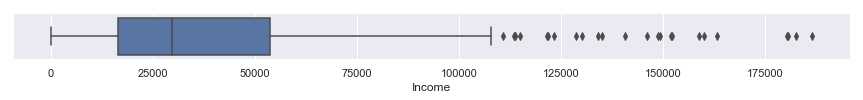

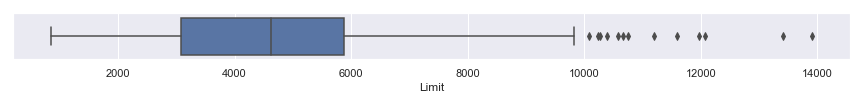

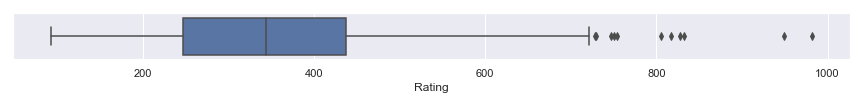

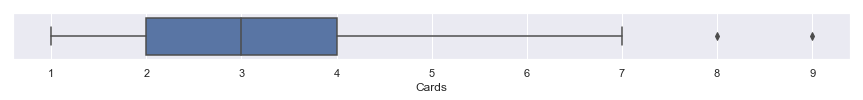

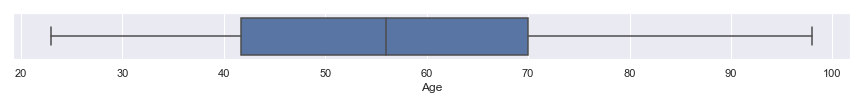

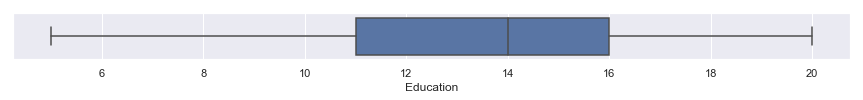

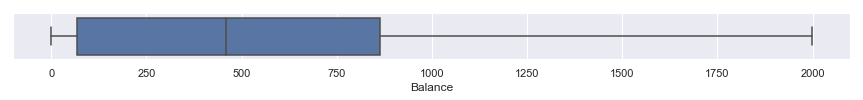

In [14]:
for index, values in enumerate(num_credito):
    plt.figure(figsize=(15,8))
    plt.subplot(8,1,index+1)
    sns.boxplot(num_credito[values])


Observamos que hay columnas que no cuentan con datos atípicos por lo cual dejaremos las que si tienen y asi analizar si son datos que se escapan o que en realidad se pueden considerar como medida.

In [15]:
col_con_outliers = num_credito[['Income','Limit','Rating','Cards']]

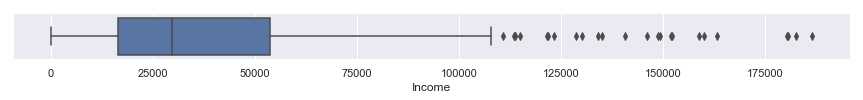

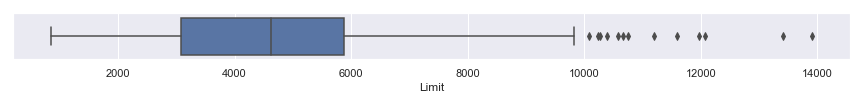

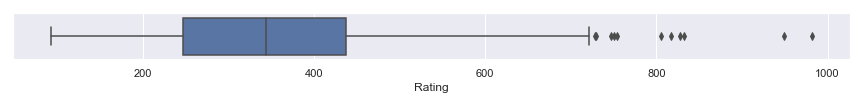

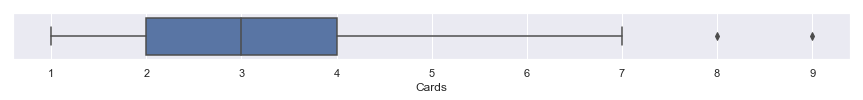

In [16]:
for index, values in enumerate(col_con_outliers):
    plt.figure(figsize=(15,8))
    plt.subplot(8,1,index+1)
    sns.boxplot(num_credito[values])

In [17]:
col_con_outliers.describe()

,Income,Limit,Rating,Cards
count,400.000000,400.000000,400.000000,400.000000
mean,40674.582500,4735.600000,354.940000,2.957500
std,35521.124353,2308.198848,154.724143,1.371275
min,120.000000,855.000000,93.000000,1.000000
25%,16481.250000,3088.000000,247.250000,2.000000
50%,29715.000000,4622.500000,344.000000,3.000000
75%,53778.250000,5872.750000,437.250000,4.000000
max,186634.000000,13913.000000,982.000000,9.000000


In [18]:
outliers=col_con_outliers.apply((lambda x: (x<(x.mean()-x.std()*3)) | (x>(x.mean()+x.std()*3)))).sum() 

In [19]:
outliers

Income    11
Limit      4
Rating     4
Cards      2
dtype: int64

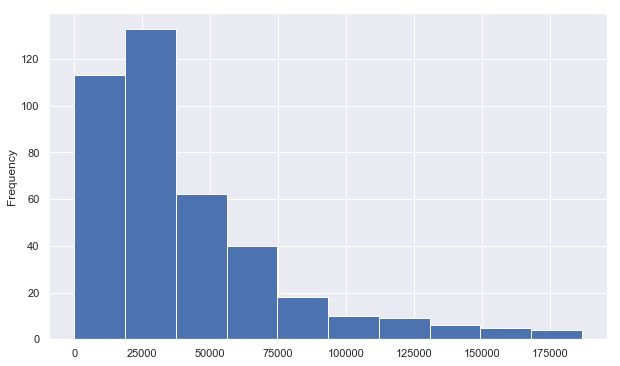

In [20]:
credito.Income.plot.hist(figsize=(10,6));

Podemos pensar que estos datos son Outliers, pero analizando el caso de __Income__, el cual es el ingreso anual disponible en miles de dolares, hay personas que pueden ganar mucho más que los demás lo cual no considero un dato atípico(Outlier). Lo mismo podemos decir de la columna **Limit** ya que esta relacionada con **Income** porque es el credito que el banco da dependiendo de cuanto gana la persona. Y **Rating** es el puntaje que sirve para rankear a la persona y asi asignar el `Credito`.

**Asi que no eliminaremos o modificaremos ningun dato Outliers**

# 3)  Generar análisis exploratorio basándose en variables de su interés.


In [21]:
credito.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104593,7075,514,4,71,11,Male,No,No,Asian,580
3,148924,9504,681,3,36,11,Female,No,No,Asian,964
4,55882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


* ¿Cuantas personas son __estudiantes__ y tienen tarjetas?

In [22]:
print(f'De un total de {len(credito)} personas, hay {len(credito[credito["Student"]=="Yes"].reset_index(drop=True))} estudiantes que tienen Tarjetas')

De un total de 400 personas, hay 40 estudiantes que tienen Tarjetas


    Representemos esto en un gráfico

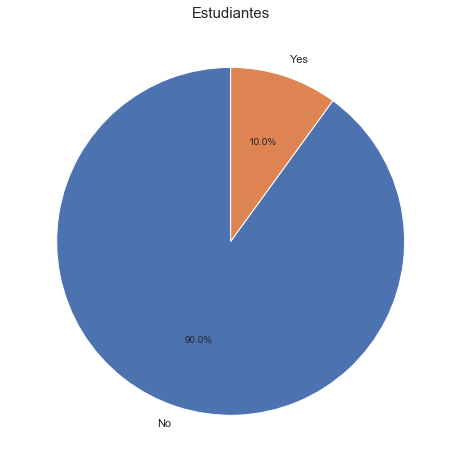

In [23]:
plt.figure(figsize=(20,8))
credito.Student.value_counts().plot(kind='pie',startangle=90,autopct='%1.1f%%')
plt.title('Estudiantes',fontdict={'fontsize':15})
plt.ylabel('');


* ¿Cuantas personas son __solteras__ ?

In [24]:
print(f'De un total de {len(credito)} personas, hay {len(credito[credito["Married"]=="No"])} Solteros')

De un total de 400 personas, hay 155 Solteros


    Como se verá en un gráfico

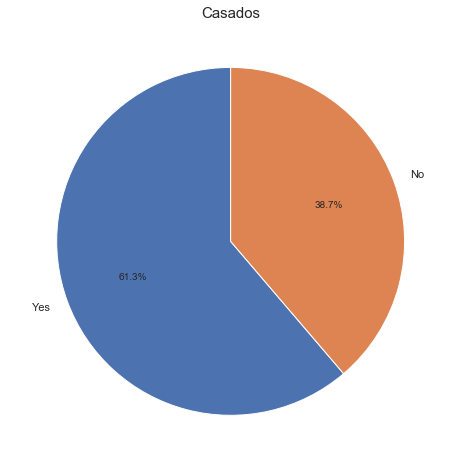

In [25]:
plt.figure(figsize=(20,8))
credito.Married.value_counts().plot(kind='pie',startangle=90,autopct='%1.1f%%')
plt.title('Casados',fontdict={'fontsize':15})
plt.ylabel('');

* ¿Cuantas personas no tienen **ninguna deuda** y que **edad** tiene el que debe más dinero?

In [26]:
print(f'{len(credito[credito["Balance"]==0])} son las personas que no tienen ninguna deuda y la edad de la persona que debe más dinero tiene {credito["Age"].iloc[credito["Balance"].agg("idxmax")]} años')

90 son las personas que no tienen ninguna deuda y la edad de la persona que debe más dinero tiene 98 años


* Veamos quien tiene los mayores ingresos de cada __Genero__

In [27]:
credito.loc[credito.groupby('Gender').Income.agg('idxmax')].reset_index(drop=True)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,182728,13913,982,4,98,17,Male,No,Yes,Caucasian,1999
1,186634,13414,949,2,41,14,Female,No,Yes,African American,1809


Podemos observar que hay uno de los hombres que más gana tiene **98** años y una mujer de **41** años, gana más que cualquier hombre.

* En base a lo anterior, en promedio ¿Ganaran más las mujeres o los hombres al año?

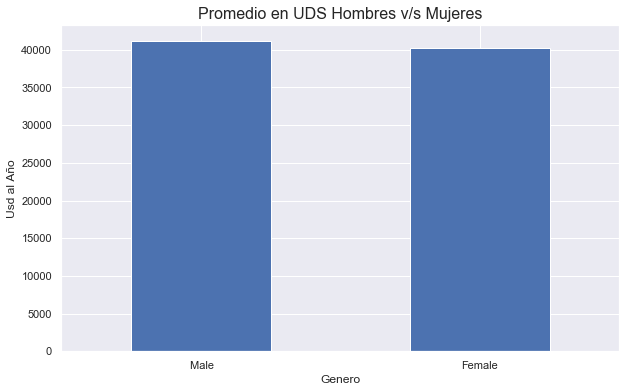

In [28]:
credito.groupby('Gender')['Income'].mean().plot.bar(figsize=(10,6),rot=0);
plt.title('Promedio en UDS Hombres v/s Mujeres',fontdict={'fontsize':16})
plt.ylabel('Usd al Año')
plt.xlabel('Genero');

Se observa que por poco los hombres ganan más

* ¿Cuantas personas tienen al menos 3 ___Tarjetas de Credito___ y es menor de __30 años__?

In [29]:
credito[(credito['Cards']==3)&(credito['Age']<30)].reset_index(drop=True)


,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,31861,6375,469,3,25,16,Female,No,Yes,Caucasian,1120
1,63931,5728,435,3,28,14,Female,No,Yes,African American,581
2,80861,4090,335,3,29,15,Female,No,Yes,Asian,0
3,29567,5309,397,3,25,15,Male,No,No,Caucasian,799
4,10503,2923,232,3,25,18,Female,No,Yes,African American,191
5,29638,5833,433,3,29,15,Female,No,Yes,Asian,942


* ¿Quien esta más endeudado, **Hombres** o **Mujeres**?

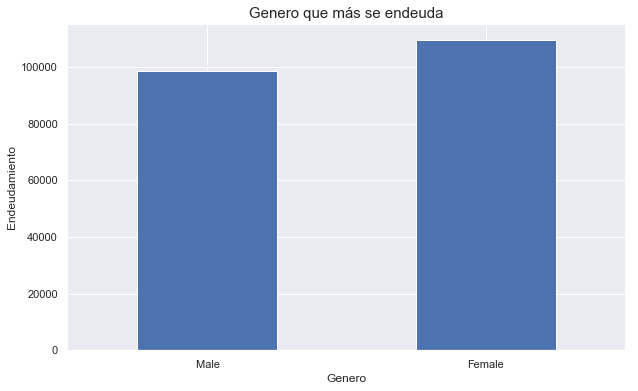

In [30]:
credito.groupby('Gender')['Balance'].sum().plot.bar(figsize=(10,6),rot=0)
plt.title('Genero que más se endeuda',fontdict={'fontsize':15})
plt.xlabel('Genero')
plt.ylabel('Endeudamiento');


    Se observa que las mujeres estan más endeudadas

* ¿Quien tiene mas **tarjetas de credito**, Hombres o Mujeres?

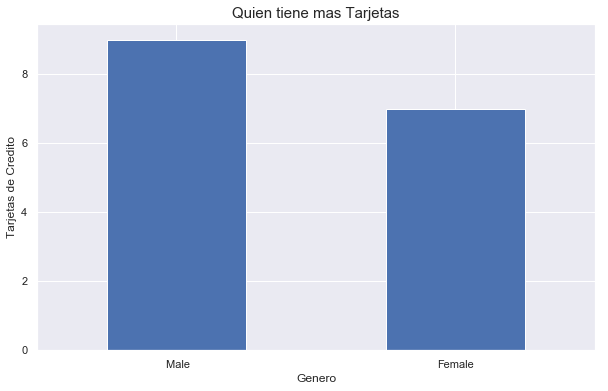

In [31]:
credito.groupby('Gender')['Cards'].max().plot.bar(figsize=(10,6),rot=0)
plt.title('Quien tiene mas Tarjetas',fontdict={'fontsize':15})
plt.xlabel('Genero')
plt.ylabel('Tarjetas de Credito');

    Aunque el hombre tengas más tarjetas, esta menos endeudado

* Nivel de Educacion que gana más dinero al año


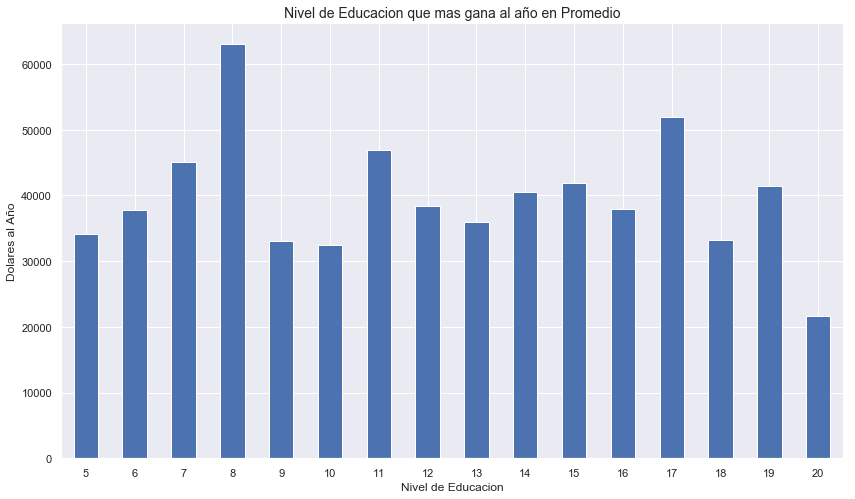

In [32]:
credito.groupby('Education')['Income'].mean().plot.bar(figsize=(14,8),rot=0)
plt.title('Nivel de Educacion que mas gana al año en Promedio', fontdict={'fontsize':14})
plt.xlabel('Nivel de Educacion')
plt.ylabel('Dolares al Año');

# 4)  Generar análisis de correlación. Generar Matriz y scatterplots.

Vamos a binarizar las columnas que son categoricas para realizar de una forma mas completa el analisis de Correlación

In [33]:
credito.dtypes

Income        int32
Limit         int64
Rating        int64
Cards         int64
Age           int64
Education     int64
Gender       object
Student      object
Married      object
Ethnicity    object
Balance       int64
dtype: object

In [34]:
x= credito[['Income','Limit','Rating','Cards','Age','Education','Balance']]
dummies = pd.get_dummies(data=credito[['Gender','Student','Married','Ethnicity']], drop_first=True)
binary_credito= dummies.add(x,fill_value=0)

In [35]:
binary_credito.head(10)

,Age,Balance,Cards,Education,Ethnicity_Asian,Ethnicity_Caucasian,Gender_Female,Income,Limit,Married_Yes,Rating,Student_Yes
0,34.0,333.0,2.0,11.0,0.0,1.0,0.0,14891.0,3606.0,1.0,283.0,0.0
1,82.0,903.0,3.0,15.0,1.0,0.0,1.0,106025.0,6645.0,1.0,483.0,1.0
2,71.0,580.0,4.0,11.0,1.0,0.0,0.0,104593.0,7075.0,0.0,514.0,0.0
3,36.0,964.0,3.0,11.0,1.0,0.0,1.0,148924.0,9504.0,0.0,681.0,0.0
4,68.0,331.0,2.0,16.0,0.0,1.0,0.0,55882.0,4897.0,1.0,357.0,0.0
5,77.0,1151.0,4.0,10.0,0.0,1.0,0.0,8018.0,8047.0,0.0,569.0,0.0
6,37.0,203.0,2.0,12.0,0.0,0.0,1.0,20996.0,3388.0,0.0,259.0,0.0
7,87.0,872.0,2.0,9.0,1.0,0.0,0.0,71408.0,7114.0,0.0,512.0,0.0
8,66.0,279.0,5.0,13.0,0.0,1.0,1.0,15125.0,3300.0,0.0,266.0,0.0
9,41.0,1350.0,3.0,19.0,0.0,0.0,1.0,71061.0,6819.0,1.0,491.0,1.0


Observemos la Correlación entre variables

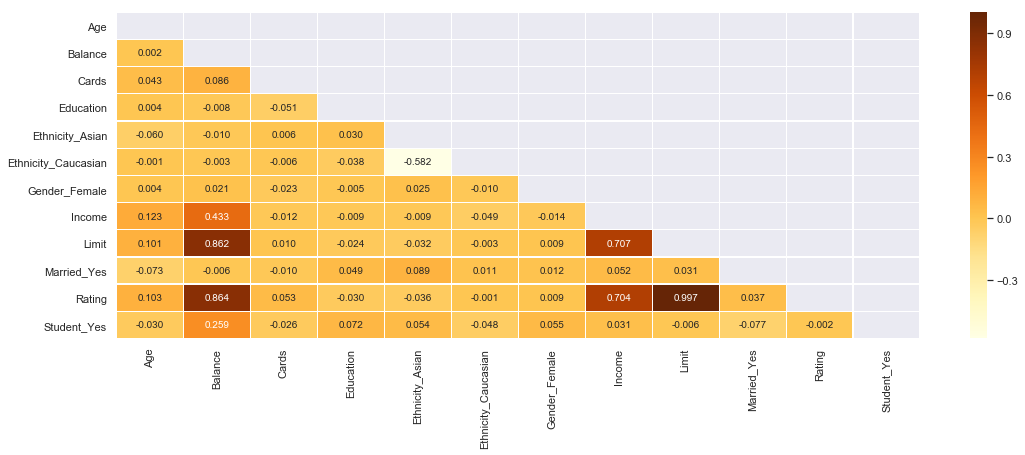

In [36]:
# binary_credito.corr().round(3).style.background_gradient(cmap='YlOrBr')
plt.figure(figsize=(18,6))
mask = np.zeros_like(binary_credito.corr(method='pearson'), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(binary_credito.corr(),annot=True,fmt='.3f', mask=mask, cmap='YlOrBr',linewidths=.3);

Vamos a resaltar solo las correlaciones que estan por sobre un **0.4**

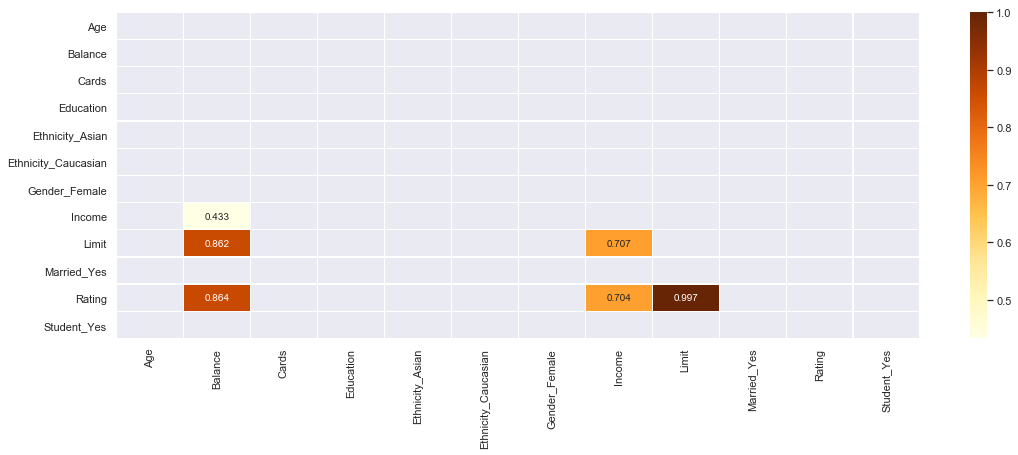

In [37]:
plt.figure(figsize=(18,6))
a=binary_credito.corr()
r=a[abs(a>=0.4)]
sns.heatmap(r,annot=True,fmt='.3f', mask=mask, cmap='YlOrBr',linewidths=.3);

Hay columnas que tienen una alta correlacion entre ellas, **Income** con **Balance** *(0.464)* **Limit** con **Balance** *(0.862)* **Rating** con **Balance** *(0.864)* **Limit** con **Income** *(0.792)* **Rating** con **Income** *(0.791)* y **Rating** con **Limit** *(0.997)*. Revisemos con scatterplots esa correlacion.

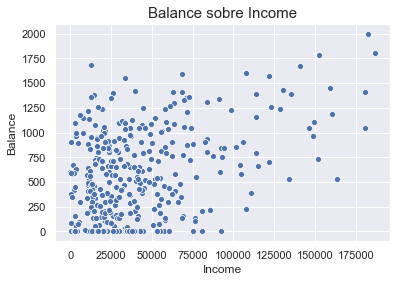

In [38]:
# Escojamos las columnas que se muestran con una alta correlacion en el heatmap
sns.scatterplot(x='Income',y='Balance',data=credito)
plt.title(f'Balance sobre Income',fontdict={'fontsize':15});

A pesar de la dispersión entre **Balance** e **Income**, se puede ver una correlación positiva entre las columnas

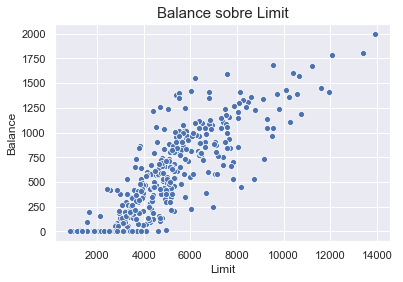

In [39]:
sns.scatterplot(x='Limit',y='Balance',data=credito)
plt.title(f'Balance sobre Limit',fontdict={'fontsize':15});

**Balance** y **Limit** tambien muestran una correlación positiva y una menor dispención en comparacion al anterior gráfico

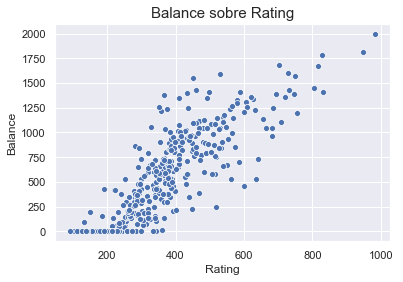

In [40]:
sns.scatterplot(x='Rating',y='Balance',data=credito)
plt.title(f'Balance sobre Rating',fontdict={'fontsize':15});

Se puede observar una correlacion positiva entre las columnas **Balance** y **Rating**

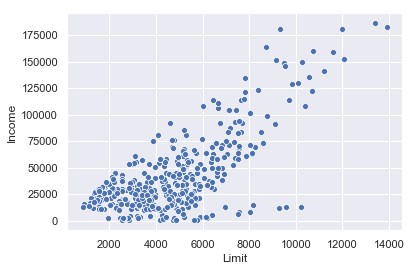

In [41]:
#corrleacion de Limit e Income
sns.scatterplot(x='Limit',y='Income',data=credito);

Hay una correlación positiva entre la columna **Income** y la columna **Limit**

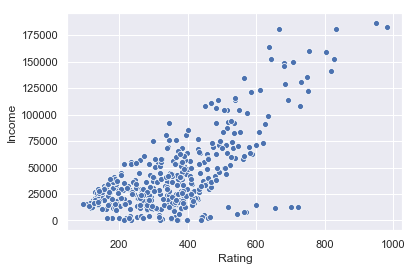

In [42]:
#corrleacion de Rating e Income
sns.scatterplot(x='Rating',y='Income',data=credito);

Entre **Rating** e **Income** se observa una correlación positiva también

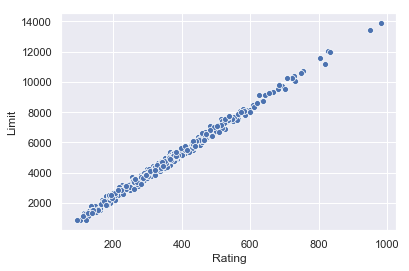

In [43]:
#corrleacion de Rating y Limit
sns.scatterplot(x='Rating',y='Limit',data=credito);

Podemos observar que en el ultimo grafico el cual es **Limit** y **Rating**, existe una muy **alta correlacion positiva**

# 5) Generar una función que dibuje un histograma y que además identifique de manera visual la media y mediana. Esta función debe ser aplicada para las variables ‘Balance’, ‘Income’, ‘Rating’ y ‘cards’. Según los gráficos generados, como es el comportamiento de estas variables.


In [44]:
def histograma(df,col):
    plt.subplots_adjust(hspace=0.35)
    df[col].plot.hist(figsize=(15,7))
    plt.title(f'Histograma de {col}', fontdict={'fontsize':15})
    plt.xlabel(col)
    plt.axvline(df[col].mean(), color='r', linestyle='dashed', linewidth=2)
    plt.axvline(df[col].median(), color='y', linestyle='dashed', linewidth=2);
    plt.legend((f'Media {round(df[col].mean(),1)}',f'Mediana {round(df[col].median(),1)}'));
    return

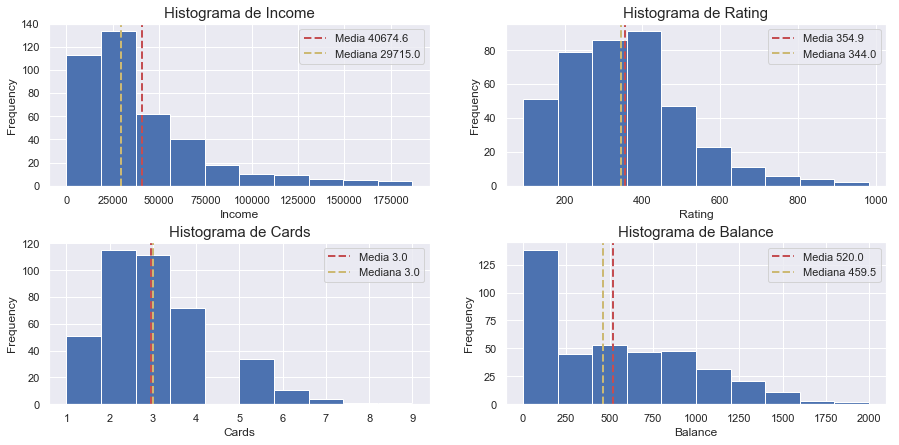

In [45]:
col_need=credito[['Income','Rating','Cards','Balance']]
for index,name in enumerate(col_need):
    plt.subplot(2,2,index+1)
    histograma(col_need,name)

Observaciones de los Histogramas:

* En los **Histograma de Income y Balance** se puede observar que la **Mediana** esta separada de la **Media** ya que la primera es menor a la **Media**.
* En el **Histograma de Rating** La medida de la **Media** es muy similar a la **Mediana**.
* En el **Histograma de Cards** tanto la **Media y la Mediana** son iguales


# Regresion Lineal
Items del 6 al 9

## 6)  Generar 3 regresiones lineales simple para la variable “Balance” (variable dependiente) utilizando como variables independientes  ‘Student’, ‘Income’, ‘Rating’ respectivamente (una para cada regresión). Identificar coeficientes de la recta y ver cuales de estas tres explica de mejor forma el fenómeno.


In [46]:
#Se usara Statsmodels para realizar la regresion lineal
import statsmodels.api as sm
from statsmodels.api import add_constant

X(variable independiente) = 'Student' ,'Income','Rating'

Y(variable dependiente) = 'Balance'

In [47]:
binary_credito.head()

,Age,Balance,Cards,Education,Ethnicity_Asian,Ethnicity_Caucasian,Gender_Female,Income,Limit,Married_Yes,Rating,Student_Yes
0,34.0,333.0,2.0,11.0,0.0,1.0,0.0,14891.0,3606.0,1.0,283.0,0.0
1,82.0,903.0,3.0,15.0,1.0,0.0,1.0,106025.0,6645.0,1.0,483.0,1.0
2,71.0,580.0,4.0,11.0,1.0,0.0,0.0,104593.0,7075.0,0.0,514.0,0.0
3,36.0,964.0,3.0,11.0,1.0,0.0,1.0,148924.0,9504.0,0.0,681.0,0.0
4,68.0,331.0,2.0,16.0,0.0,1.0,0.0,55882.0,4897.0,1.0,357.0,0.0


**1) Regresion Linear Simple de Income sobre Balance**

In [48]:
X = binary_credito['Income']
Y = binary_credito['Balance']

X = sm.add_constant(X)
modelo = sm.OLS(Y, X).fit()
predicciones = modelo.predict(X) 

print_model = modelo.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     91.65
Date:                Fri, 22 Nov 2019   Prob (F-statistic):           1.12e-19
Time:                        00:13:40   Log-Likelihood:                -2977.9
No. Observations:                 400   AIC:                             5960.
Df Residuals:                     398   BIC:                             5968.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        292.2487     31.570      9.257      0.0

E:\MachineLearning\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [49]:
modelo.params

const     292.248704
Income      0.005600
dtype: float64

Podemos observar que nuestro modelo tiene un "**Adj. R-squared: 0.185**" equivalente a un **18%** lo cual no explica que la columna **Income** sirva para predecir **Balance**

**2) Regresion Linear Simple de Student_Yes sobre Balance**

In [50]:
X1 = binary_credito['Student_Yes']
Y1 = binary_credito['Balance']

X1 = sm.add_constant(X1)
modelo1= sm.OLS(Y1,X1).fit()
predicciones1= modelo1.predict(X1)

ver_modelo1= modelo1.summary()
print(ver_modelo1)

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     28.62
Date:                Fri, 22 Nov 2019   Prob (F-statistic):           1.49e-07
Time:                        00:13:40   Log-Likelihood:                -3005.5
No. Observations:                 400   AIC:                             6015.
Df Residuals:                     398   BIC:                             6023.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         480.3694     23.434     20.499      

In [51]:
modelo1.params

const          480.369444
Student_Yes    396.455556
dtype: float64

Definitivamente la columna **Student_Yes** no es explicativa con respecto a **Balance** ya que tiene un **Adj. R-squared: 0.065** del **6%**

**3) Regresion Linear Simple de Rating sobre Balance**

In [52]:
X2 = binary_credito['Rating']
Y2 = binary_credito['Balance']

X2 = sm.add_constant(X2)
modelo2 = sm.OLS(Y2,X2).fit()
predicciones2 = modelo2.predict(X2)

ver_modelo2 = modelo2.summary()
print(ver_modelo2)

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     1168.
Date:                Fri, 22 Nov 2019   Prob (F-statistic):          1.90e-120
Time:                        00:13:41   Log-Likelihood:                -2745.4
No. Observations:                 400   AIC:                             5495.
Df Residuals:                     398   BIC:                             5503.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -390.8463     29.069    -13.446      0.0

In [53]:
modelo2.params

const    -390.846342
Rating      2.566240
dtype: float64

En este modelo la columna **Rating** es mas explicativa para predecir **Balance** ya que tiene un **Adj. R-squared: 0.745** subiendo a un **75%** su predicción pero no es sufuciente aún


## 7) Genere una nueva regresión lineal utilizando todos los regresores (todas las columnas). Indique cuales son sus coeficientes. ¿Cual es el que más repercute en el modelo?

In [54]:
X_A = binary_credito[['Age','Cards','Education','Ethnicity_Asian','Ethnicity_Caucasian','Gender_Female','Income','Limit','Married_Yes','Rating','Student_Yes']]
Y3 = binary_credito['Balance']

X_A = sm.add_constant(X_A)
modelo3 = sm.OLS(Y3,X_A).fit()
predicciones3 = modelo3.predict(X_A)

ver_modelo3 = modelo3.summary()
print(ver_modelo3)

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     290.5
Date:                Fri, 22 Nov 2019   Prob (F-statistic):          1.21e-179
Time:                        00:13:41   Log-Likelihood:                -2574.7
No. Observations:                 400   AIC:                             5173.
Df Residuals:                     388   BIC:                             5221.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -369.0293    

Podemos observar que al utilizar todas las columnas nos entrega un **Adj. R-squared: 0.889** dejando ver que este modelo explica en un **89%** el comportamiento de **Balance**.

In [55]:
modelo3.params

const                 -369.029334
Age                     -1.655104
Cards                   27.794941
Education               -0.130294
Ethnicity_Asian          4.413765
Ethnicity_Caucasian     -1.053030
Gender_Female           -6.994918
Income                  -0.004712
Limit                    0.237178
Married_Yes             -3.833956
Rating                  -0.191322
Student_Yes            424.787535
dtype: float64

In [56]:
modelo3.params.max()

424.78753527040874

## 8) Utilizando `lmplot` de `seaborn`, inspeccione el comportamiento de los tres principales determinantes. ¿Qué comportamiento observa?.

He escogido a **Rating** , **Income** , **Student_Yes** como las 3 principales determinantes a mi parecer usando su pvalues como referencia

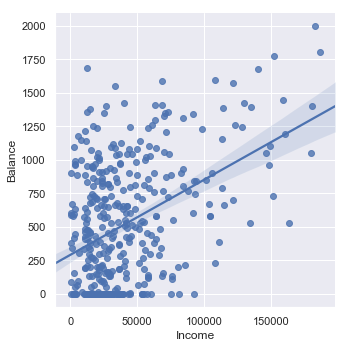

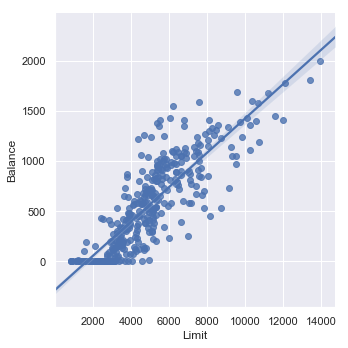

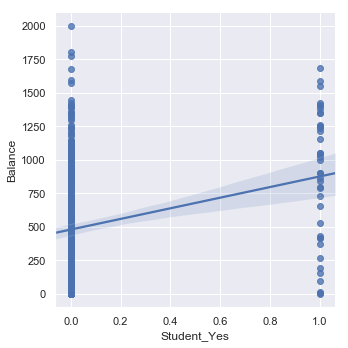

In [57]:
sns.set(color_codes=True)
graf = binary_credito[['Income','Limit','Student_Yes']]
for index,nam in enumerate(graf):
  sns.lmplot(x=nam, y="Balance", data=binary_credito)


Tanto en **Income** y **Limit** se observa que aunque hay dispersión en los puntos hay una correlación positiva, y en **Student_Yes** la concentración de datos se encuentra en los que no estudian

## 9) Bonus:  Depure el modelo utilizando solo los regresores más significativos (pvalues =< 0.025) Genere un nuevo modelo con solo estos regresores. ¿Qué diferencias encuentra con respecto al modelo de la pregunta 7.?


In [58]:
X_A1 = binary_credito[['Age','Cards','Income','Limit','Student_Yes']]
Y31 = binary_credito['Balance']

X_A1 = sm.add_constant(X_A1)
modelo31 = sm.OLS(Y31,X_A1).fit()
predicciones31 = modelo31.predict(X_A1)

ver_modelo31 = modelo31.summary()
print(ver_modelo31)

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     648.2
Date:                Fri, 22 Nov 2019   Prob (F-statistic):          1.40e-187
Time:                        00:13:44   Log-Likelihood:                -2575.0
No. Observations:                 400   AIC:                             5162.
Df Residuals:                     394   BIC:                             5186.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -380.6323     33.314    -11.426      

Al observar el modelo del punto **7)** en el cual usamos todas las columnas, nuestro modelo explico en un *95%* el comportamiento de balance. Ahora depuramos el modelo con **Pvalues** quitando columnas que tienen un valor menor igual a **0.025** (pvalues<=0.025).

En conclusión nos damos cuenta que nuestro modelo sigue explicando en un **89%** el comportamiento de **Balance** pero libera la carga de tiempo en procesar los datos.